In [1]:
import math

def add(x, y):
    output = x.copy()
    for i in range(len(x)):
        output[i] += y[i]
    return output

In [2]:
    x = [i + 0. for i in range(4)]
    y = [i + 4. for i in range(4)]
    z = [i - 2. for i in range(4)]
    A = [[i * 4. + j for j in range(4)] for i in range(3)]
    print("************************************")

    print("test function of Sum of vectors")
    print("x =")
    print(x)
    print("y =")
    print(y)
    print("add(x, y) =")
    print(add(x, y))
    # print(x + y)
    print("************************************")

************************************
test function of Sum of vectors
x =
[0.0, 1.0, 2.0, 3.0]
y =
[4.0, 5.0, 6.0, 7.0]
add(x, y) =
[4.0, 6.0, 8.0, 10.0]
************************************


In [3]:
def matmul(A, x):
    """
    A: 行列
    B: 列ベクトル
    
    """
    output = [0] * len(A)
    for i in range(len(A)):
        for j in range(len(A[0])):
            output[i] += A[i][j]*x[j]
    return output


In [4]:
print("test function of Vector-matrix product")
print("A =")
print(A)
print("x =")
print(x)
print("matmul(A, x) =")
print(matmul(A, x))
# print(np.matmul(A, x))
print("************************************")

test function of Vector-matrix product
A =
[[0.0, 1.0, 2.0, 3.0], [4.0, 5.0, 6.0, 7.0], [8.0, 9.0, 10.0, 11.0]]
x =
[0.0, 1.0, 2.0, 3.0]
matmul(A, x) =
[14.0, 38.0, 62.0]
************************************


In [6]:
def transpose(A):
    """
    A[i][j]のiとjを入れ替える
    """
    # output = np.zeros([len(A[0]), len(A)])
    output = [[0 for j in range(len(A))] for i in range(len(A[0]))]
    for i in range(len(A)):
        for j in range(len(A[0])):
            output[j][i] = A[i][j]
    return output

In [7]:
print("test function of Transpose")
print("A =")
print(A)
print("transpose(A) =")
print(transpose(A))
# print(np.transpose(A))
print("************************************")

test function of Transpose
A =
[[0.0, 1.0, 2.0, 3.0], [4.0, 5.0, 6.0, 7.0], [8.0, 9.0, 10.0, 11.0]]
transpose(A) =
[[0.0, 4.0, 8.0], [1.0, 5.0, 9.0], [2.0, 6.0, 10.0], [3.0, 7.0, 11.0]]
************************************


In [8]:
def relu(x):
    output = x.copy()
    for i in range(len(x)):
        if x[i]>0: output[i] = x[i]
        else: output[i] = 0
    return output

In [9]:
print("test function of ReLU")
print("z =")
print(z)
print("relu(z) =")
print(relu(z))
print("************************************")

test function of ReLU
z =
[-2.0, -1.0, 0.0, 1.0]
relu(z) =
[0, 0, 0, 1.0]
************************************


In [11]:
def softmax(x):
    sum = 0.
    for i in range(len(x)):
        sum += math.e ** x[i]
    output = x.copy()
    for i in range(len(x)):
        output[i] = math.e ** output[i] / sum
    return output

In [12]:
print("test function of Softmax")
print("x =")
print(x)
print("softmax(x) =")
print(softmax(x))
print("************************************")

test function of Softmax
x =
[0.0, 1.0, 2.0, 3.0]
softmax(x) =
[0.03205860328008499, 0.08714431874203257, 0.23688281808991013, 0.6439142598879722]
************************************


In [13]:
def backward(p, q):
    output = p.copy()
    for i in range(len(p)):
        if q[i]>0:
            output[i] = p[i]
        else:
            output[i] = 0
    return output


In [14]:
print("test function of Backward")
print("x =")
print(x)
print("z =")
print(z)
print("backward(x, z) =")
print(backward(x, z))
print("************************************")

test function of Backward
x =
[0.0, 1.0, 2.0, 3.0]
z =
[-2.0, -1.0, 0.0, 1.0]
backward(x, z) =
[0, 0, 0, 3.0]
************************************


In [15]:
### 問題２
def load_pgm(path):
    lines = []
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            if i==0:
                lines.append(line)
            elif i==1 or i==2:
                lines.extend(list(map(int, line.split())))
            else:
                lines.extend(list(map(float, line.split())))
    # shape = lines[1:3]
    color_range = lines[3]
    factors = lines[4:]
    for i in range(len(factors)):
        factors[i] /= color_range
    # factors = np.array(factors)
    return factors

In [28]:
print("loading files...")
x = []
for i in range(154):
    x.append(load_pgm("pgm/{}.pgm".format(i+1)))
# print(x)

loading files...


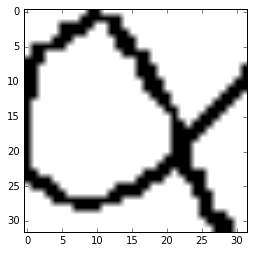

In [25]:
# debug
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

x_img = np.array(x[10])
x_img = x_img.reshape(32,32)
plt.imshow(x_img, cmap='gray')
plt.show()


In [26]:
class Model():
    def __init__(self, path):
        H = 256
        N = 1024
        C = 23
        lines = []
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                lines.extend(list(map(float, line.split())))
        # lines = np.array(lines)
        self.W_1 = lines[:H*N]
        self.W_1 = [[self.W_1[i*N+j] for j in range(N)] for i in range(H)]
        # self.W_1 = np.array(self.W_1)
        self.b_1 = lines[H*N:H*N+H]
        self.W_2 = lines[H*N+H:H*N+H+H*H]
        self.W_2 = [[self.W_2[i*H+j] for j in range(H)] for i in range(H)]
        # self.W_2 = np.array(self.W_2)
        self.b_2 = lines[H*N+H+H*H:H*N+H+H*H+H]
        self.W_3 = lines[H*N+H+H*H+H:H*N+H+H*H+H+C*H]
        self.W_3 = [[self.W_3[i*H+j] for j in range(H)] for i in range(C)]
        # self.W_3 = np.array(self.W_3)
        self.b_3 = lines[H*N+H+H*H+H+C*H:H*N+H+H*H+H+C*H+C]

    def predict(self, x):
        self.a1 = 
        h1 =
        self.a2 =
        h2 = p1.relu(self.a2)
        y = 
        fx = 
        return fx

    def fgsm(self, x, y, epsilon0):
        fx = self.predict(x)
        minus_delta_t = [0] * 23
        minus_delta_t[y-1] = -1
        L_y = p1.add(minus_delta_t, fx)
        L_h2 = p1.matmul(p1.transpose(self.W_3), L_y)
        L_a2 = p1.backward(L_h2, self.a2)
        L_h1 = p1.matmul(p1.transpose(self.W_2), L_a2)
        L_a1 = p1.backward(L_h1, self.a1)
        L_x = p1.matmul(p1.transpose(self.W_1), L_a1)

        # print("L_x shape", len(L_x))

        output = x.copy()
        for i in range(len(x)):
            output[i] += sign(L_x[i]) * epsilon0
            output[i] = max(output[i], 0)
            output[i] = min(output[i], 1)
            output[i] = float(int(output[i] * 255)) / 255
        return output


    def fgsm2(self, x, y, k):
        fx = self.predict(x)
        minus_delta_t = [0] * 23
        minus_delta_t[y-1] = -1
        L_y = p1.add(minus_delta_t, fx)
        L_h2 = p1.matmul(p1.transpose(self.W_3), L_y)
        L_a2 = p1.backward(L_h2, self.a2)
        L_h1 = p1.matmul(p1.transpose(self.W_2), L_a2)
        L_a1 = p1.backward(L_h1, self.a1)
        L_x = p1.matmul(p1.transpose(self.W_1), L_a1)

        L_x_abs = L_x.copy() # 摂動方向が(0, 1)からはみ出さない方向の値の絶対値を取る
        for i in range(len(x)):
            if x[i] == 0 and L_x_abs[i]<0:
                L_x_abs[i] = 0
            elif x[i] == 1 and L_x_abs[i]>0:
                L_x_abs[i] = 0
            elif x[i] == 1 and L_x_abs[i]<0:
                L_x_abs[i] = -L_x_abs[i]
        # print(x[:20])
        # print(L_x[:20])
        # print(L_x_abs[:20])
        # print("L_x shape", len(L_x))

        L_x_abs_sort = heapq.nlargest(k, L_x_abs) # 摂動量の値を大きい順に並べる
        # print(L_x_abs_sort)

        output = x.copy()
        for i in range(k): # 摂動方向の大きい順から値を変更していく
            selected_index = L_x_abs.index(L_x_abs_sort[i])
            # print("i:", i)
            # print("selected index:",selected_index)
            # print("x[selected_index]", x[selected_index])
            # print("L_x[selected_index]", L_x[selected_index])
            output[selected_index] = 1 - output[selected_index]

        return output


In [33]:
print("test start")

# print(x)
# x = x.reshape(32,32)
# plt.imshow(x, cmap='gray')
# plt.show()

model = Model("param.txt")


test start


In [34]:
a1 = matmul(model.W_1, x[0])
a1 = 
h1 = 
self.a2 =
h2 = p1.relu(self.a2)
y = 
fx = 




[-0.0068510477,
 -0.0075278264,
 -0.020101998,
 -0.005969499,
 -0.0060048574,
 -0.018876655,
 -0.05960903,
 -0.0057461895,
 -0.0039568553,
 -0.00600517,
 -0.01215585,
 0.020159964,
 -0.0056612403,
 -0.006001584,
 -0.0060048643,
 -0.0060030804,
 -0.00427639,
 0.0074866065,
 -0.039897256,
 -0.006285873,
 -0.0029142315,
 -0.0047593215,
 -0.0035784224,
 -0.0040621087,
 0.02270899,
 -0.0060053207,
 -0.0053260853,
 -0.00504274,
 0.004140312,
 -0.005040889,
 0.017720684,
 -0.0044960184,
 0.002310123,
 0.07250656,
 0.0040929965,
 -0.0075649703,
 -0.006005284,
 -0.02178229,
 0.01580703,
 -0.041668393,
 0.046043333,
 -0.0049502235,
 -0.006000251,
 -0.0055131353,
 0.026855929,
 -0.0045599006,
 0.01171982,
 -0.030125385,
 -0.03733791,
 -0.005994193,
 -0.009244121,
 -0.0051242174,
 -0.0032056347,
 0.031489465,
 -0.0025839028,
 -0.005109385,
 -0.005556774,
 -0.006003553,
 -0.017017636,
 -0.006752851,
 0.009833382,
 -0.008572895,
 -0.005730074,
 0.037865844,
 0.008457964,
 -0.046954747,
 -0.00598863,